In [16]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [13]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=1)

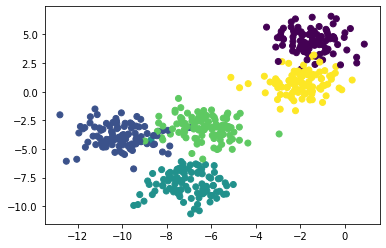

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [17]:
estimator = KMeans(n_clusters=4, random_state=2).fit(X)

In [31]:
labels_esti = estimator.labels_

In [20]:
centerids = estimator.cluster_centers_

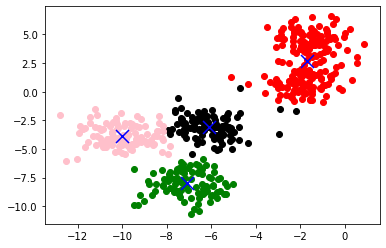

In [33]:
color = ["black", "red", "green", "pink"]
n_clusters = 4

for i in range(n_clusters):
	plt.scatter(X[labels_esti==i, 0], X[labels_esti==i, 1], c=color[i])

plt.scatter(centerids[:, 0], centerids[:, 1], marker='x', c='b', s=169)
plt.show()


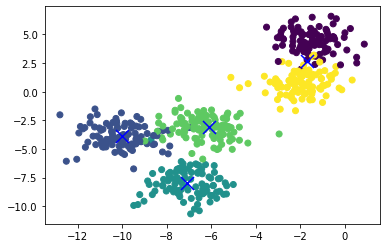

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centerids[:, 0], centerids[:, 1], marker='x', c='b', s=169)
plt.show()
#实际的类划分和选出的4个质心

In [34]:
#聚类的度量指标  - 轮廓系数
from sklearn.metrics import silhouette_score




In [35]:
silhouette_score(X, labels_esti)

0.5830422035169395

In [38]:
#通过轮廓系数来选择最优的质心个数
silhouette = []
n_range = 10
for i in range(2, n_range):
	esti = KMeans(n_clusters=i, random_state=2).fit(X)
	sil_score = silhouette_score(X, esti.labels_)
	silhouette.append(sil_score)

silhouette

[0.6490423012067442,
 0.5720605952669966,
 0.5830422035169395,
 0.5740089825824137,
 0.5178003038285843,
 0.4669476378599269,
 0.4000253918457781,
 0.3840106914579711]

/home/lewin/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


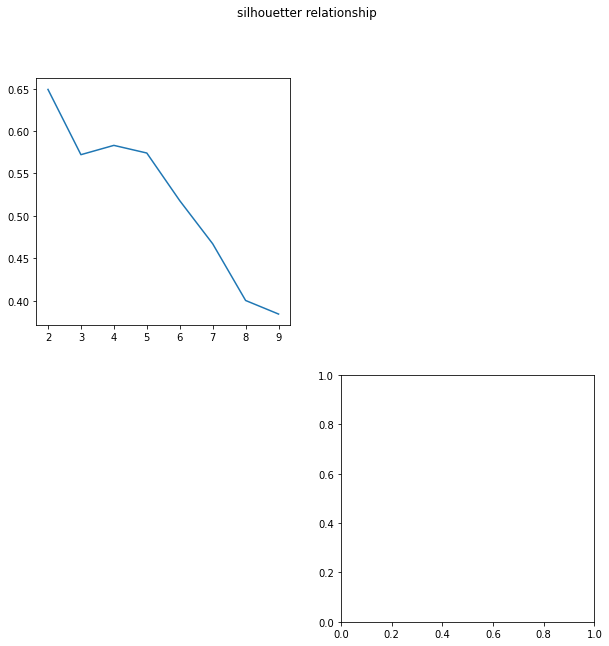

In [55]:
fig = plt.figure(figsize=(10, 10)) #返回一个Figure对象
fig.suptitle("silhouetter relationship")
ax = fig.add_subplot(2, 2, 1) #
ax.plot(range(2, n_range), silhouette)
ax2 = fig.add_subplot(2, 2, 4)
fig.show()
